In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [2]:
# Load the dataset from CSV file
df = pd.read_csv("top_insta_influencers_data.csv")

# Display the first few rows to understand the structure
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [3]:
# Check the structure of the dataset
df.info()

# Optional: Check for summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,200.000000,200,200.000000,200,200,200,200,200,200,138
unique,NaN,200,NaN,99,165,135,147,162,116,25
top,NaN,cristiano,NaN,10.0k,46.5m,1.1m,0.02%,0,1.5b,United States
freq,NaN,1,NaN,13,3,13,5,8,9,66
mean,100.500000,NaN,81.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,57.879185,NaN,8.878159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50.750000,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,100.500000,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,150.250000,NaN,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Function to convert 'k', 'm', 'b' notations into numerical values
def convert_shorthand(val):
    if isinstance(val, str):
        val = val.lower().replace(",", "").strip()  # Remove commas and spaces
        if val.endswith('k'):
            return float(val[:-1]) * 1_000
        elif val.endswith('m'):
            return float(val[:-1]) * 1_000_000
        elif val.endswith('b'):
            return float(val[:-1]) * 1_000_000_000
        else:
            try:
                return float(val)
            except ValueError:
                return np.nan
    return val


In [5]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [6]:
# List of columns to clean using the conversion function
columns_to_clean = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']

# Apply the conversion function to each column
for col in columns_to_clean:
    df[col] = df[col].apply(convert_shorthand)


In [7]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39%,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62%,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24%,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97%,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20%,665300.0,1.250000e+10,United States


In [8]:
# Remove '%' and convert the column to float
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)


In [9]:
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States


In [10]:
# Fill missing countries with 'Unknown' (or you can choose to drop them)
df['country'] = df['country'].fillna('Not Provided')


In [11]:
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,Not Provided
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States


In [12]:
# Likes to followers ratio - indicates influence per follower
df['likes_to_followers_ratio'] = df['avg_likes'] / df['followers']


In [13]:
# Engagement score - combine engagement rate with influence score
df['engagement_score'] = df['60_day_eng_rate'] * df['influence_score']

In [14]:
# Activity level - classify into Low, Medium, High based on number of posts
df['activity_level'] = pd.qcut(df['posts'], q=3, labels=['Low', 'Medium', 'High'])

In [15]:
# Categorize influencers by follower count
def follower_tier(f):
    if f >= 100_000_000:
        return 'Mega (100M+)'
    elif f >= 10_000_000:
        return 'Macro (10M - 100M)'
    elif f >= 1_000_000:
        return 'Mid (1M - 10M)'
    elif f >= 100_000:
        return 'Micro (100K - 1M)'
    else:
        return 'Nano (<100K)'

# Apply the tiering function
df['follower_tier'] = df['followers'].apply(follower_tier)

In [16]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,likes_to_followers_ratio,engagement_score,activity_level,follower_tier
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain,0.018285,127.88,Medium,Mega (100M+)
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States,0.022665,147.42,High,Mega (100M+)
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,Not Provided,0.019032,111.60,Low,Mega (100M+)
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States,0.018092,90.21,Medium,Mega (100M+)
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States,0.005687,18.20,High,Mega (100M+)


In [17]:
# Classify engagement rate into levels
def engagement_level(rate):
    if rate >= 3.0:
        return 'High'
    elif rate >= 1.0:
        return 'Medium'
    else:
        return 'Low'

# Apply the engagement classification
df['engagement_level'] = df['60_day_eng_rate'].apply(engagement_level)


In [18]:
# Calculate posts per million followers
df['post_per_million_followers'] = (df['posts'] / df['followers']) * 1_000_000


In [19]:
# Calculate influence per post
df['influence_per_post'] = df['influence_score'] / df['posts']



In [20]:
# Rank influencers within their country by followers (1 = highest)
df['country_rank'] = df.groupby('country')['followers'].rank(method='dense', ascending=False)


In [21]:
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,likes_to_followers_ratio,engagement_score,activity_level,follower_tier,engagement_level,post_per_million_followers,influence_per_post,country_rank
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain,0.018285,127.88,Medium,Mega (100M+),Medium,6.935687,0.027879,1.0
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States,0.022665,147.42,High,Mega (100M+),Medium,18.842163,0.013188,1.0
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,Not Provided,0.019032,111.60,Low,Mega (100M+),Medium,2.490904,0.101124,1.0
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States,0.018092,90.21,Medium,Mega (100M+),Low,5.252407,0.051667,2.0
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States,0.005687,18.20,High,Mega (100M+),Low,20.353188,0.013382,3.0


In [23]:

#Testing columns are working properly or not


In [24]:
# Check if any of the new columns contain NaN or inf
df[['follower_tier', 'engagement_level', 'post_per_million_followers', 
    'influence_per_post', 'country_rank']].isnull().sum()


follower_tier                 0
engagement_level              0
post_per_million_followers    0
influence_per_post            0
country_rank                  0
dtype: int64

In [25]:
# Check for infinite values (which may come from division)
df[['influence_per_post']].replace([np.inf, -np.inf], np.nan).isnull().sum()


influence_per_post    0
dtype: int64

In [26]:
# Check how many influencers fall in each follower tier
df['follower_tier'].value_counts()


follower_tier
Macro (10M - 100M)    167
Mega (100M+)           33
Name: count, dtype: int64

In [27]:
# Check engagement level distribution
df['engagement_level'].value_counts()


engagement_level
Low       106
Medium     64
High       30
Name: count, dtype: int64

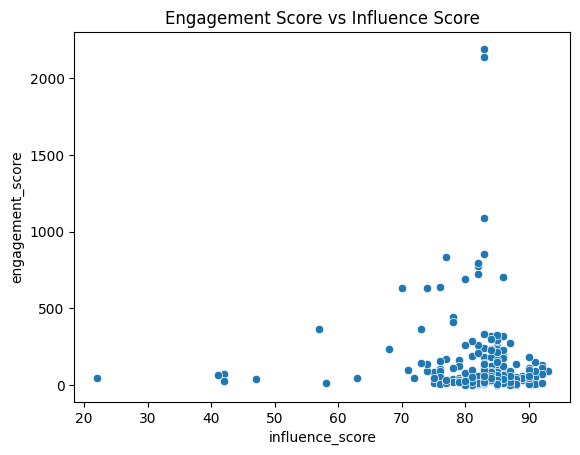

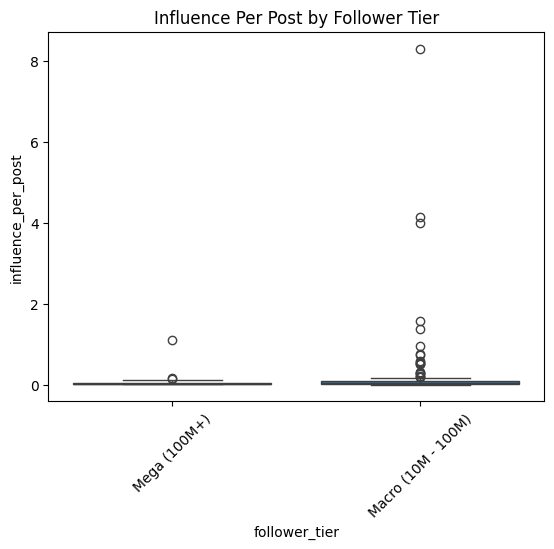

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Engagement score vs influence score
sns.scatterplot(x='influence_score', y='engagement_score', data=df)
plt.title("Engagement Score vs Influence Score")
plt.show()

# Boxplot for influence per post across tiers
sns.boxplot(x='follower_tier', y='influence_per_post', data=df)
plt.xticks(rotation=45)
plt.title("Influence Per Post by Follower Tier")
plt.show()


In [29]:
# View top 10 rows with selected useful columns
df[['channel_info', 'followers', 'follower_tier', 'engagement_level',
    'posts', 'post_per_million_followers', 'influence_per_post', 'country', 'country_rank']].head(10)


,channel_info,followers,follower_tier,engagement_level,posts,post_per_million_followers,influence_per_post,country,country_rank
0,cristiano,475800000.0,Mega (100M+),Medium,3300.0,6.935687,0.027879,Spain,1.0
1,kyliejenner,366200000.0,Mega (100M+),Medium,6900.0,18.842163,0.013188,United States,1.0
2,leomessi,357300000.0,Mega (100M+),Medium,890.0,2.490904,0.101124,Not Provided,1.0
3,selenagomez,342700000.0,Mega (100M+),Low,1800.0,5.252407,0.051667,United States,2.0
4,therock,334100000.0,Mega (100M+),Low,6800.0,20.353188,0.013382,United States,3.0
5,kimkardashian,329200000.0,Mega (100M+),Low,5600.0,17.010936,0.016250,United States,4.0
6,arianagrande,327700000.0,Mega (100M+),Medium,5000.0,15.257858,0.018400,United States,5.0
7,beyonce,272800000.0,Mega (100M+),Low,2000.0,7.331378,0.046000,United States,6.0
8,khloekardashian,268300000.0,Mega (100M+),Low,4100.0,15.281401,0.021707,United States,7.0
9,justinbieber,254500000.0,Mega (100M+),Low,7400.0,29.076621,0.012297,Canada,1.0


In [30]:
# Save cleaned and feature-enhanced dataset
df.to_csv("final_cleaned_instagram_data.csv", index=False)